# Polynomail Regression Test

- Imports

In [1]:
import numpy as np
import pandas as pd
from ml_lib.linear_models.linear_regression import LinearRegression
from ml_lib.preprocessing import SimpleImputer, StandardScaler,PolynomialFeatures, Pipeline
from ml_lib.utils.data import train_test_split
from ml_lib.metrics.math import  r2_score
import matplotlib.pyplot as plt

### Read Data

In [2]:
df = pd.read_csv(r"C:/project/datasets/poly_train.csv")
X = df.drop("y", axis=1).values
y = df["y"].values

print("First 5 rows of X:", X[:5])
print("First 5 values of y:", y[:5])

print(df.info())


First 5 rows of X: [[ 3.87158859e+04  3.21203766e+04 -1.03380879e+02 -1.05843969e+02
   1.91159044e+05  1.23970691e+00 -8.73958850e-01]
 [ 2.19888117e+04  1.80018166e+04 -2.60939557e+02 -2.36418680e+02
   8.12765278e+05 -1.30892448e+00 -7.28570554e-02]
 [ 4.29412082e+04  3.84659662e+04 -2.00070650e+02 -1.67055603e+02
   5.28232119e+05 -4.51373805e-02 -2.66584885e-01]
 [ 3.48926120e+04  3.11001138e+04 -9.77380095e+01 -1.12905153e+02
   6.29584855e+05 -1.70694146e-01 -5.13813483e-01]
 [ 4.78133321e+03  3.73473369e+03 -2.70762509e+02 -2.50962600e+02
   3.64154359e+05  3.79742876e-01 -4.39723001e-01]]
First 5 values of y: [2.18361923e+40 1.19123721e+38 1.10621887e+41 1.63308598e+40
 8.48179846e+31]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1179 non-null   float64
 1   x1      1175 non-null   float64
 2   x2      1170 non-null   float64
 3   

- Split Data (Test- Train)

In [3]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2)

Preprocessing Pipeline

In [4]:

degrees=[1,2,3,4,5]
test_r2_scores=[]
train_r2_scores=[]
best_degree = None
best_test_r2 = -np.inf
for degree in degrees:

    pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('poly',PolynomialFeatures(degree=degree)),
    ('scaler',StandardScaler())
    ])
    X_train_transformed = pipe.fit(X_train)
    model= LinearRegression(epochs=20000)
    model.fit(X_train_transformed,y_train)
    X_test_transformed = pipe.transform(X_test)
    y_pred = model.predict(X_test_transformed)
    y_train_pred=model.predict(X_train_transformed)
    test_r2 = r2_score(y_test,y_pred)
    train_r2= r2_score(y_train,y_train_pred)


    test_r2_scores.append(test_r2)
    train_r2_scores.append(train_r2)

    if test_r2>best_test_r2:
        best_test_r2 = test_r2
        best_degree = degree
        best_pipe = pipe
        best_model = model


    print(f"Degree {degree}: Train R2 = {train_r2:.4f}, Test R2 = {test_r2:.4f}")
print(f"\n  Best Degree = {best_degree}, Test R2 = {best_test_r2:.4f}")   

Degree 1: Train R2 = 0.4576, Test R2 = 0.4279
Degree 2: Train R2 = 0.7987, Test R2 = 0.7716
Degree 3: Train R2 = 0.9289, Test R2 = 0.8929
Degree 4: Train R2 = 0.9740, Test R2 = 0.9261
Degree 5: Train R2 = 0.9907, Test R2 = 0.9442

  Best Degree = 5, Test R2 = 0.9442


plot train vs test R2 score

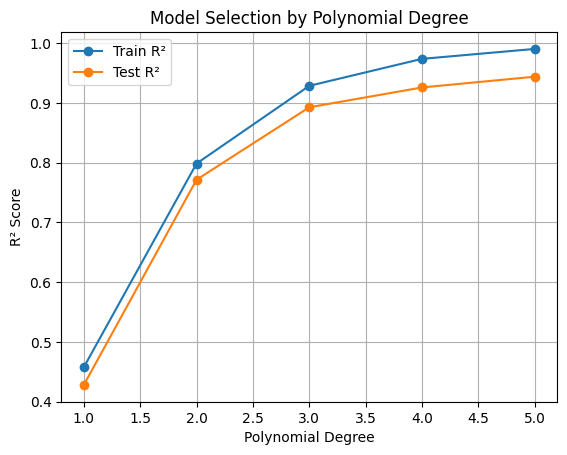

In [5]:
plt.plot(degrees, train_r2_scores, marker='o', label="Train R²")
plt.plot(degrees, test_r2_scores, marker='o', label="Test R²")

plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("Model Selection by Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()

By above calculations the model with degree 5 is technically best fitted with both r2 score high and close so the model i am going to use is with degree 5

In [6]:
df1= pd.read_csv(r'C:/project/datasets/poly_test.csv')
X_t= df1.values
print(X_t[:5])
print(X_t.shape)



[[ 3.17409012e+03  3.06809652e+03  6.60482058e+01  8.80415724e+01
   5.18895539e+05 -1.91655788e+00  2.33071069e+00]
 [ 6.90238193e+03  5.47460664e+03 -2.48355267e+02 -2.19375116e+02
   6.61364701e+05  7.95610663e-01 -2.10203984e+00]
 [ 2.80959710e+04  2.31373913e+04 -1.61858370e+02 -1.23083159e+02
   6.59235911e+05  1.06437016e+00  6.37354741e-01]
 [ 3.42107452e+04  2.92253167e+04  5.13847149e+01  3.36481053e+01
   8.94826786e+05 -6.58700166e-01 -6.96247329e-01]
 [ 2.55942374e+03  1.35183906e+03  3.47680008e+01  3.66965499e+01
   9.66655906e+05  2.62923712e+00  1.88218029e+00]]
(400, 7)


### Predict for the data

In [7]:
X_t_trans=best_pipe.transform(X_t)

y_t_pred = best_model.predict(X_t_trans)
print("Predictions:\n", y_t_pred[:10])


Predictions:
 [-4.55606817e+40 -4.06245656e+39  8.20475435e+38  4.24376790e+39
  4.26656156e+40  1.11056194e+39  5.56938263e+39  3.30119282e+39
  1.94846898e+41  2.23430360e+39]


In [9]:
id = np.arange(1,X_t_trans.shape[0]+1)
df1=pd.DataFrame({
        'id':id,
        'target':y_t_pred
})

df1.to_csv("C:\project\datasets\processed\Polynomial_Regression_Predictions.csv",index=False)

<>:7: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:7: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
C:\Users\moham\AppData\Local\Temp\ipykernel_9356\1753529617.py:7: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  df1.to_csv("C:\project\datasets\processed\Polynomial_Regression_Predictions.csv",index=False)
